In [1]:
import os
os.sys.path.append(os.path.abspath('../src'))

In [8]:
import jax
jax.config.update("jax_enable_x64", True)
import arviz as az
import numpyro
numpyro.set_host_device_count(4)

from elisa.data.ogip import Data
from elisa.inference.fit import BayesianFit, LikelihoodFit
from elisa.model import *

path = '/Users/xuewc/ObsData/FRB221021/HXMT/'
LE = Data([5, 10], f'{path}/LE_optbmin5.fits',
          f'{path}/LE_phabkg20s_g0_0-94.pha', f'{path}/LE_rsp.rsp',
          group='bmin', scale=25)

ME = Data([10, 35], f'{path}/ME_optbmin5.fits',
          f'{path}/ME_phabkg20s_g0_0-53.pha', f'{path}/ME_rsp.rsp',
          group='bmin', scale=25)

HE = Data([28, 250], f'{path}/HE_optbmin5.fits',
          f'{path}/HE_phabkg20s_g0_0-12.pha', f'{path}/HE_rsp.rsp',
          group='bmin', scale=25)
m = Powerlaw()
f = LikelihoodFit([LE, ME, HE], m, 'wstat')
print(f)
f

Likelihood Fit
┌──────┬──────────┬───────────┐
│ Data │  Model   │ Statistic │
├──────┼──────────┼───────────┤
│  LE  │ powerlaw │   wstat   │
├──────┼──────────┼───────────┤
│  ME  │ powerlaw │   wstat   │
├──────┼──────────┼───────────┤
│  HE  │ powerlaw │   wstat   │
└──────┴──────────┴───────────┘
┌─────┬───────────┬───────────┬───────┬────────────────┐
│ No. │ Component │ Parameter │ Value │     Bound      │
├─────┼───────────┼───────────┼───────┼────────────────┤
│  1  │  powerlaw │   alpha   │  1.01 │    (-3, 10)    │
├─────┼───────────┼───────────┼───────┼────────────────┤
│  2  │  powerlaw │     K     │  1.0  │ (1e-10, 1e+10) │
└─────┴───────────┴───────────┴───────┴────────────────┘


Likelihood Fit
┌──────┬──────────┬───────────┐
│ Data │  Model   │ Statistic │
├──────┼──────────┼───────────┤
│  LE  │ powerlaw │   wstat   │
├──────┼──────────┼───────────┤
│  ME  │ powerlaw │   wstat   │
├──────┼──────────┼───────────┤
│  HE  │ powerlaw │   wstat   │
└──────┴──────────┴───────────┘
┌─────┬───────────┬───────────┬───────┬────────────────┐
│ No. │ Component │ Parameter │ Value │     Bound      │
├─────┼───────────┼───────────┼───────┼────────────────┤
│  1  │  powerlaw │   alpha   │  1.01 │    (-3, 10)    │
├─────┼───────────┼───────────┼───────┼────────────────┤
│  2  │  powerlaw │     K     │  1.0  │ (1e-10, 1e+10) │
└─────┴───────────┴───────────┴───────┴────────────────┘

In [7]:
mle = f.mle()
print(mle.mle)
mle.status

{'powerlaw_alpha': 1.8583443226403273, 'powerlaw_K': 0.4687933618190972}


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 197.8 (χ²/ndof = 1.1)      │         Nfcn = 56, Ngrad = 7         │
│ EDM = 2.89e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘

In [9]:
f = BayesianFit([LE, ME, HE], m, 'wstat')
f.nuts()

  0%|          | 0/22000 [00:00<?, ?it/s]

  0%|          | 0/22000 [00:00<?, ?it/s]

  0%|          | 0/22000 [00:00<?, ?it/s]

  0%|          | 0/22000 [00:00<?, ?it/s]

array([[<AxesSubplot: title={'center': 'powerlaw_K'}>,
        <AxesSubplot: title={'center': 'powerlaw_K'}>],
       [<AxesSubplot: title={'center': 'powerlaw_alpha'}>,
        <AxesSubplot: title={'center': 'powerlaw_alpha'}>]], dtype=object)

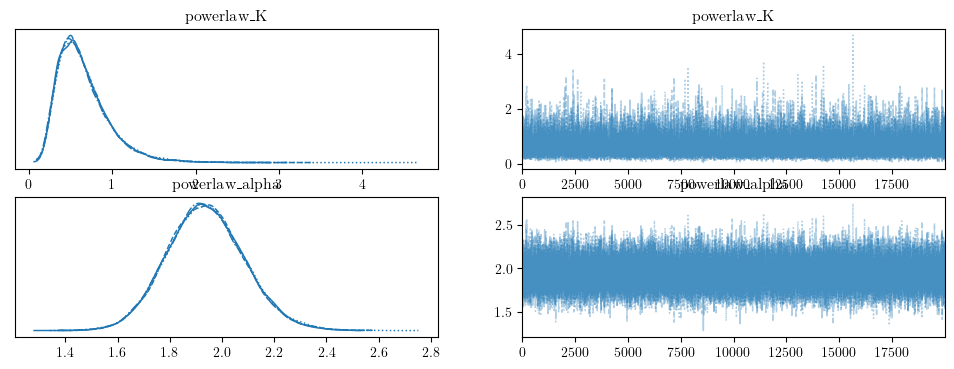

In [10]:
az.plot_trace(f._nuts_idata)